In [1]:
import os.path
import sqlite3
import socket
import matplotlib.pyplot as plt

from torch.utils.data import Dataset

if socket.gethostname() == 'LTSSL-sKTPpP5Xl':
    data_dir = 'C:\\Users\\ams90\\PycharmProjects\\ConceptsBirds\\data'
elif socket.gethostname() == 'LAPTOP-NA88OLS1':
    data_dir = 'D:\\data\\caltecBirds\\CUB_200_2011'
else:
    data_dir = '/home/bwc/ams90/datasets/caltecBirds/CUB_200_2011'


In [2]:
conn = sqlite3.connect(database=os.path.join(data_dir, 'birds.db'))
cursor = conn.cursor()

In [3]:
classes  = [(class_id, class_name)     for (class_id, class_name)     in cursor.execute("select class_id, class_name from classes").fetchall()]
concepts = [(concept_id, concept_name) for (concept_id, concept_name) in cursor.execute("select concept_id,concept_name from concepts").fetchall()]

In [5]:
def concept_value_counts():
    cursor = conn.cursor()
    sql = ("""select d.concept_name,
                     i.trainset,
                     a.value,
                     count(a.value)
              from   images i, 
                     classes cc, 
                     image_attributes ia,
                     attributes a,
                     concepts d
              where i.class_id = cc.class_id 
              and   i.image_id = ia.image_id 
              and   a.attribute_id = ia.attribute_id
              and   d.concept_id   = a.concept_id
              and   ia.present = 1
              and   cc.class_id = 3
              group by 
                     i.trainset,
                     cc.class_name,
                     d.concept_name,
                     a.value
              order by
                     d.concept_name,
                     cc.class_name,
                     i.trainset
                     """)
    cursor.execute(sql)
    records = cursor.fetchall()
    cursor.close()
    return records
records = concept_value_counts()

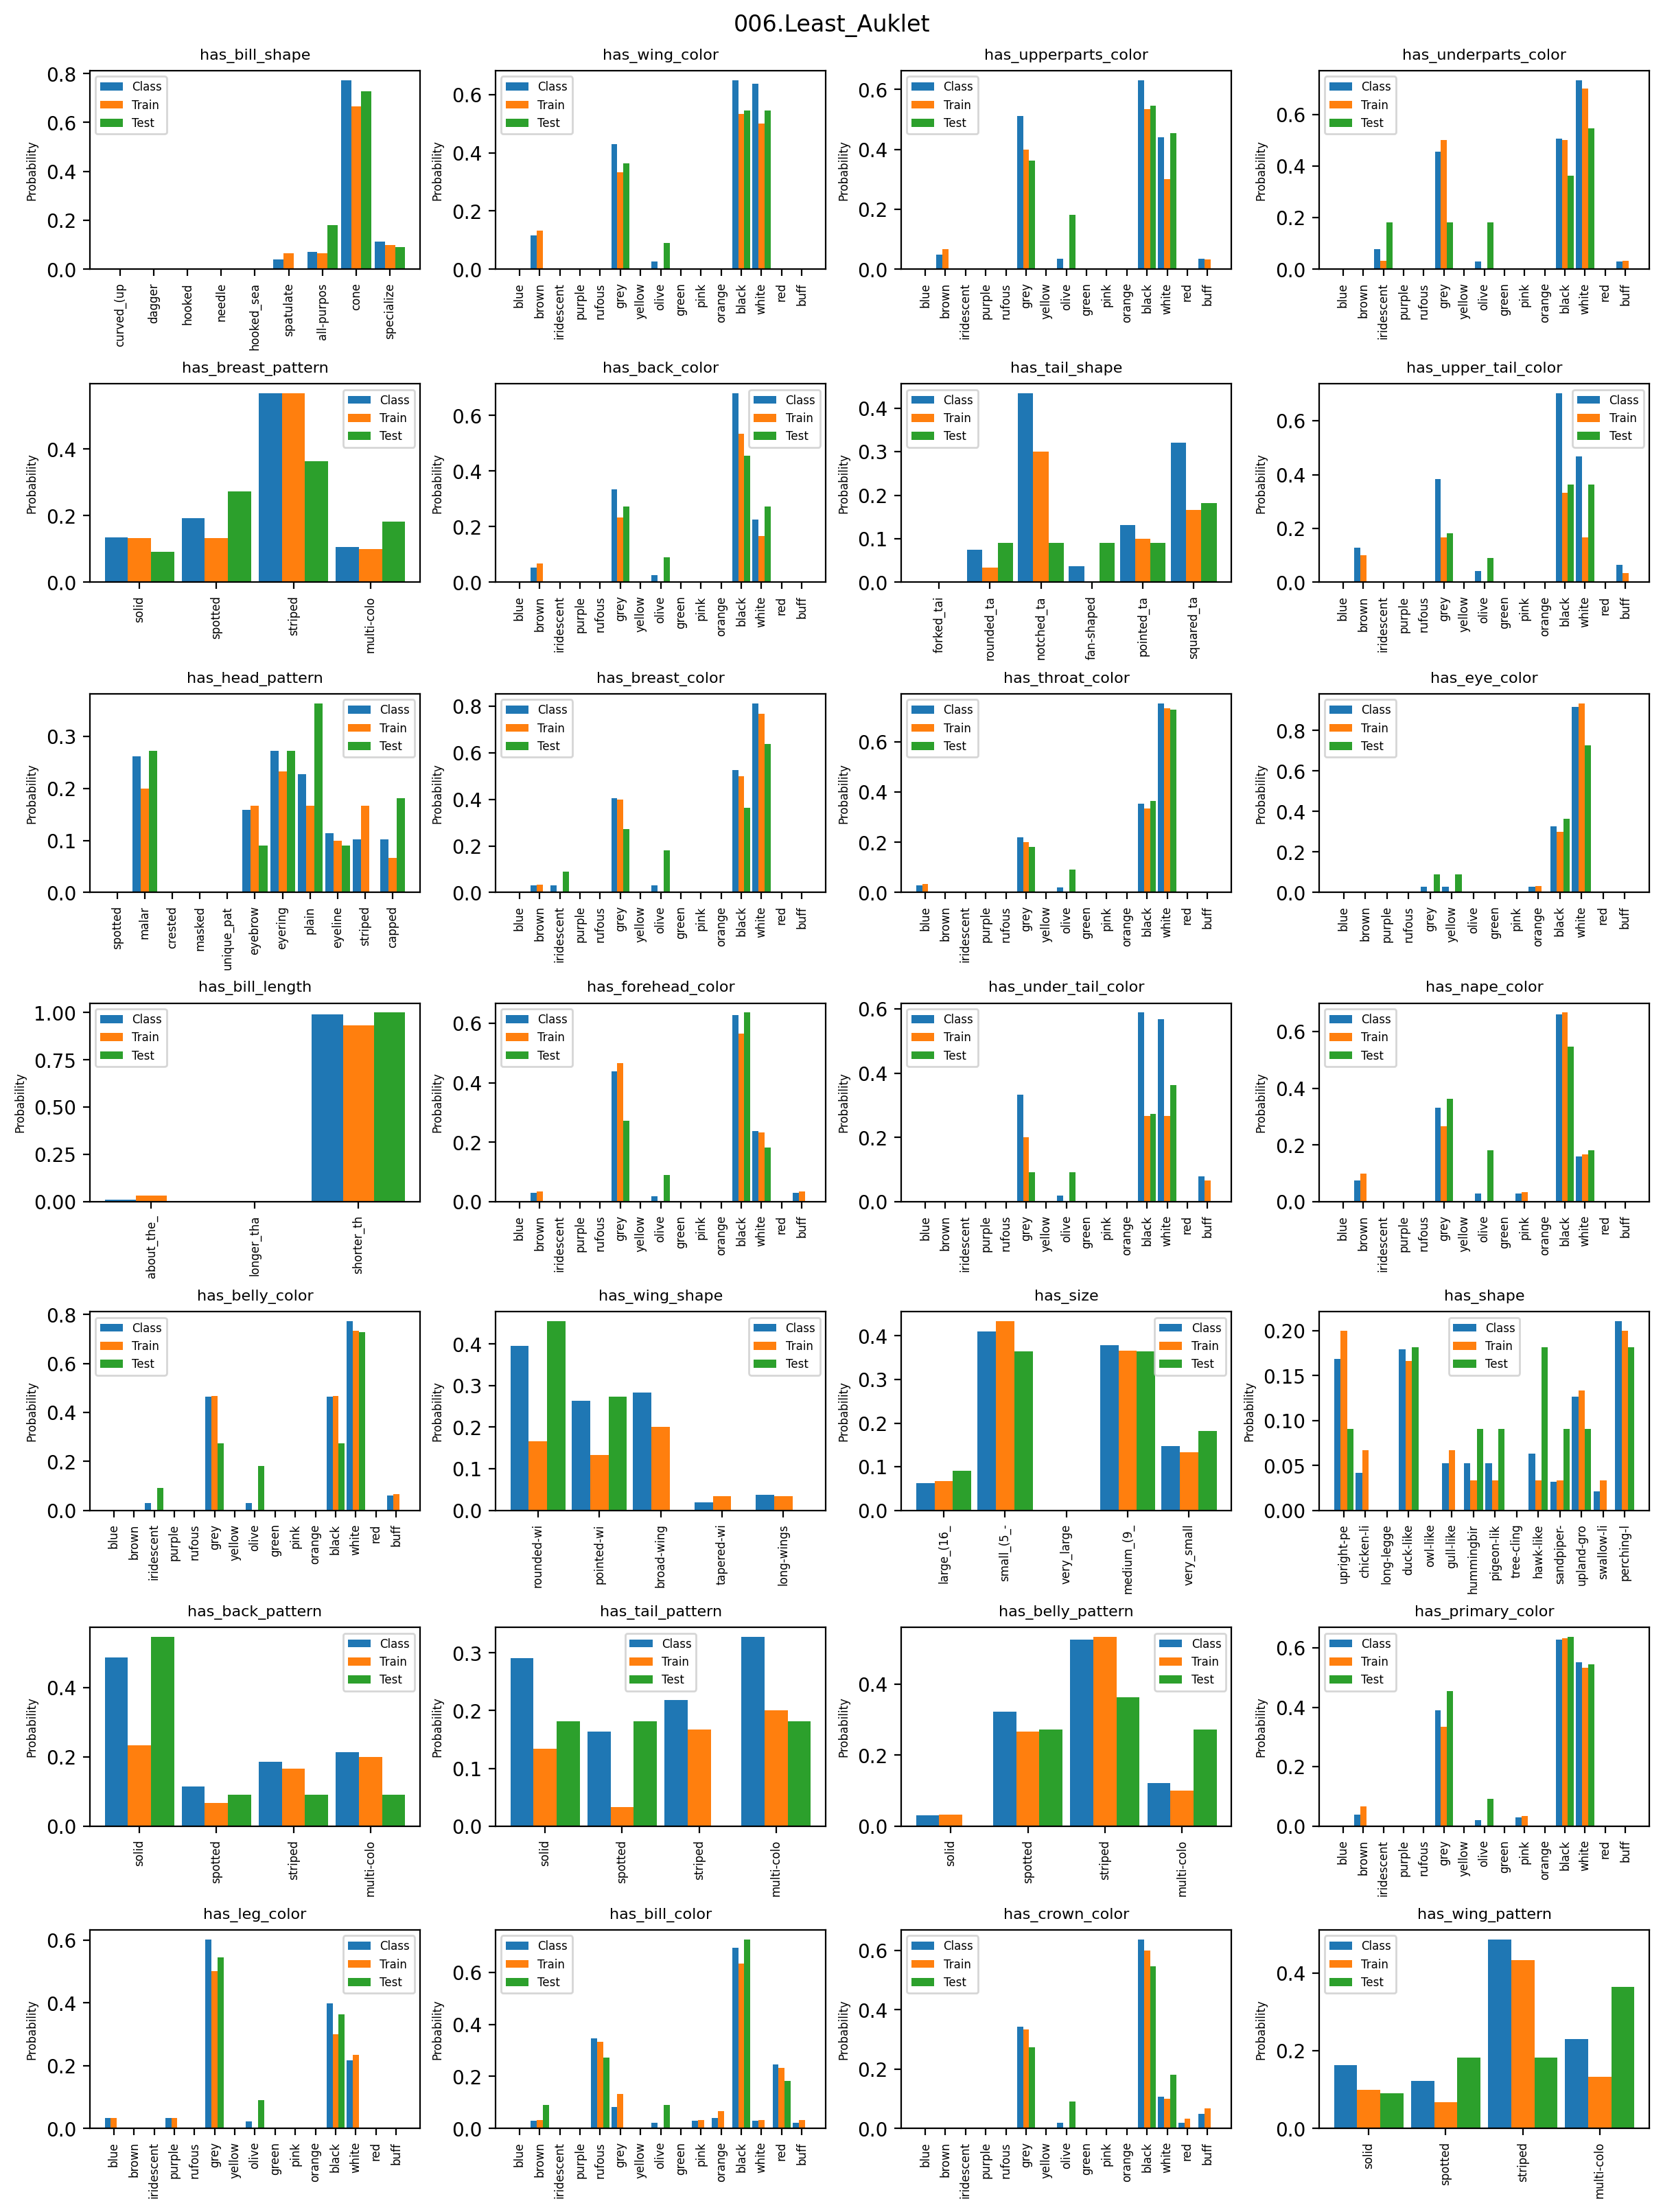

In [10]:
rows, cols = 7,4
class_id = 6

fig, ax = plt.subplots(nrows=rows, ncols=cols, layout='constrained', dpi=200, figsize=(12,16))
fig.suptitle([name for (id, name) in classes if id == class_id][0])
for row in range(rows):
    for col in range(cols):
        concept_id = 1 + (row * cols)  + col
        # Retreive the list of possible values for the concept.
        values    = [value for value in cursor.execute("select value_id, value from attributes where concept_id = ?", (concept_id,)).fetchall()]
        value_ids   = [value[0] for value in values]
        value_names = [value[1][:10] for value in values]
                
        class_probs = [record for record in 
                       cursor.execute("""select p.probability,
                                                p.naive_train_probability,
                                                p.naive_test_probability
                                     from   class_attribute_probabilities p,
                                            attributes a
                                     where  p.class_id = ?
                                     and    p.attribute_id = a.attribute_id
                                     and    a.concept_id = ?
                                     order by a.value_id
                                     """, (class_id, concept_id)).fetchall()]
        
        class_probs = [[probabilty[field] for probabilty in class_probs] for field in range(3)]
        
        width = 0.30  # the width of the bars
        multiplier = 0

        for dataset, probabilties in enumerate(class_probs):
            offset = width * multiplier
            bar_starts = [value_id + offset for value_id in value_ids]
            rects = ax[row][col].bar(bar_starts, probabilties, width)
            multiplier += 1
            
        tick_starts = [value_id + width for value_id in value_ids]
    
               
        ax[row][col].set_title([concept[1] for concept in concepts if concept[0] == concept_id][0],  fontsize=8)
        ax[row][col].set_ylabel('Probability', fontsize=6)
        ax[row][col].set_xticks(tick_starts, value_names, rotation=90, fontsize=6)
        ax[row][col].legend( ['Class', 'Train', 'Test'],  fontsize=6)

plt.savefig('class_' + str(class_id))


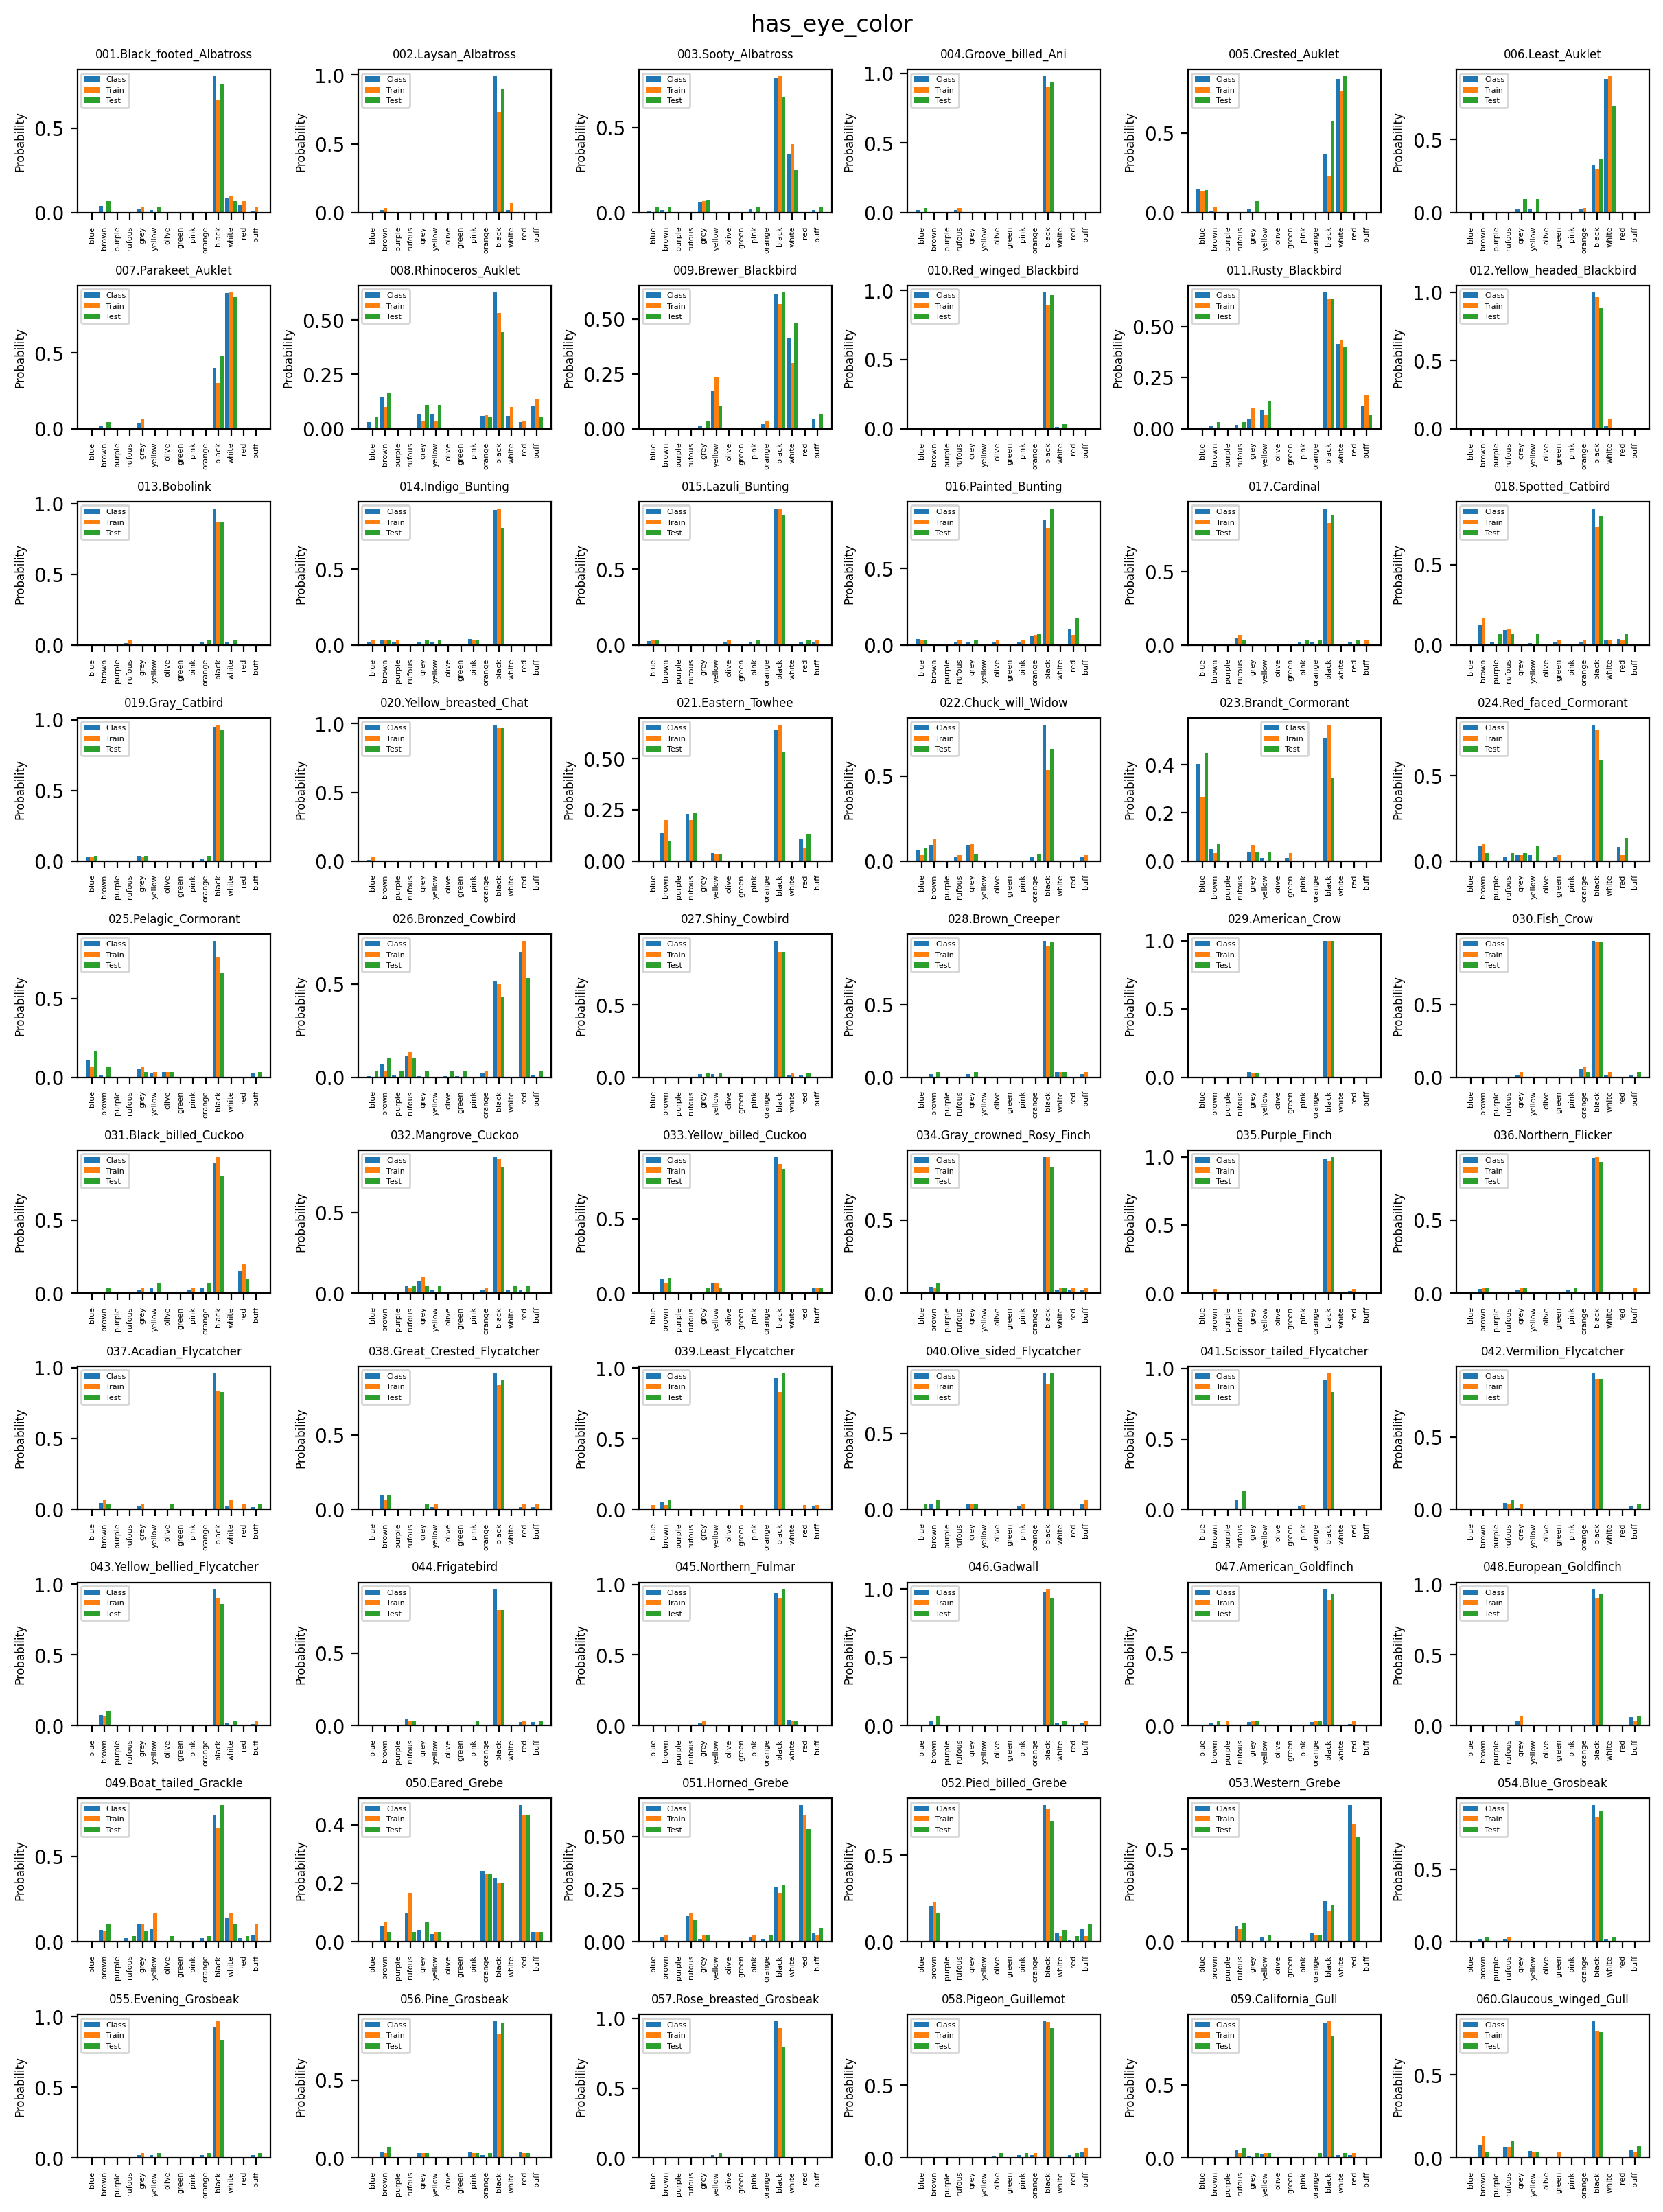

In [5]:
rows, cols = 10,6
concept_id = 12

fig, ax = plt.subplots(nrows=rows, ncols=cols, layout='constrained', dpi=200, figsize=(12,16))
fig.suptitle([name for (id, name) in concepts if id == concept_id][0])
for row in range(rows):
    for col in range(cols):
        class_id = 1 + (row * cols)  + col
        # Retreive the list of possible values for the concept.
        values    = [value for value in cursor.execute("select value_id, value from attributes where concept_id = ?", (concept_id,)).fetchall()]
        value_ids   = [value[0] for value in values]
        value_names = [value[1][:10] for value in values]
                
        class_probs = [record for record in 
                       cursor.execute("""select p.probability,
                                                p.naive_train_probability,
                                                p.naive_test_probability
                                     from   class_attribute_probabilities p,
                                            attributes a
                                     where  p.class_id = ?
                                     and    p.attribute_id = a.attribute_id
                                     and    a.concept_id = ?
                                     order by a.value_id
                                     """, (class_id, concept_id)).fetchall()]
        
        class_probs = [[probabilty[field] for probabilty in class_probs] for field in range(3)]
        
        width = 0.30  # the width of the bars
        multiplier = 0

        for dataset, probabilties in enumerate(class_probs):
            offset = width * multiplier
            bar_starts = [value_id + offset for value_id in value_ids]
            rects = ax[row][col].bar(bar_starts, probabilties, width)
            multiplier += 1
            
        tick_starts = [value_id + width for value_id in value_ids]
    
               
        ax[row][col].set_title([cls[1] for cls in classes if cls[0] == class_id][0],  fontsize=6)
        ax[row][col].set_ylabel('Probability', fontsize=6)
        ax[row][col].set_xticks(tick_starts, value_names, rotation=90, fontsize=4)
        ax[row][col].legend( ['Class', 'Train', 'Test'],  fontsize=4)

plt.savefig('concept_' + str(concept_id))


In [4]:
concepts

[(1, 'has_bill_shape'),
 (2, 'has_wing_color'),
 (3, 'has_upperparts_color'),
 (4, 'has_underparts_color'),
 (5, 'has_breast_pattern'),
 (6, 'has_back_color'),
 (7, 'has_tail_shape'),
 (8, 'has_upper_tail_color'),
 (9, 'has_head_pattern'),
 (10, 'has_breast_color'),
 (11, 'has_throat_color'),
 (12, 'has_eye_color'),
 (13, 'has_bill_length'),
 (14, 'has_forehead_color'),
 (15, 'has_under_tail_color'),
 (16, 'has_nape_color'),
 (17, 'has_belly_color'),
 (18, 'has_wing_shape'),
 (19, 'has_size'),
 (20, 'has_shape'),
 (21, 'has_back_pattern'),
 (22, 'has_tail_pattern'),
 (23, 'has_belly_pattern'),
 (24, 'has_primary_color'),
 (25, 'has_leg_color'),
 (26, 'has_bill_color'),
 (27, 'has_crown_color'),
 (28, 'has_wing_pattern')]